<a href="https://colab.research.google.com/github/sathasivamn/Project-3-602-Resume-Classification/blob/main/Project_3_Resume_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Python libraries
!pip install python-docx
!pip install PyPDF2
!pip install textract
!pip install joblib scikit-learn matplotlib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.6 MB/s eta 0:00:00
Requested textract from https://files.pythonhosted.org/packages/6b/3e/ac16b6bf28edf78296aea7d0cb416b49ed30282ac8c711662541015ee6f3/textract-1.6.5-py3-none-any.whl has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    extract-msg (<=0.29.*)
                 ~~~~~~~^
Please use pip<24.1 if you need to use this version.
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
# Required for textract to read .doc files
!apt-get update -y
!apt-get install -y antiword unrtf poppler-utils tesseract-ocr libreoffice


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.6 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [6,066 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,160 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubu

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Example path (change to your zip folder)
# DATA_PATH = "/content/drive/MyDrive/your_folder/"


Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()


Saving resume_classification.zip to resume_classification.zip


In [5]:
import zipfile, os

ZIP_NAME = "resume_classification.zip"   # CHANGE if different

with zipfile.ZipFile(ZIP_NAME, 'r') as zip_ref:
    zip_ref.extractall("data")

DATA_PATH = "/content/data"


In [6]:
!apt-get update -y
!apt-get install -y libreoffice


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://cli.github.com/packages stable InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [7]:
import os

folder = "/content/data"  # <-- your resumes folder

for file in os.listdir(folder):
    if file.endswith(".doc"):
        input_path = os.path.join(folder, file)
        output_path = os.path.join(folder, file.replace(".doc", ".docx"))

        !soffice --headless --convert-to docx "{input_path}" --outdir "{folder}"

print("DOC → DOCX Conversion Completed!")


DOC → DOCX Conversion Completed!


In [8]:
from docx import Document
import PyPDF2
import os

def read_docx(path):
    try:
        doc = Document(path)
        return "\n".join([p.text for p in doc.paragraphs])
    except:
        return ""

def read_pdf(path):
    try:
        reader = PyPDF2.PdfReader(path)
        txt = ''
        for page in reader.pages:
            txt += page.extract_text() or ""
        return txt
    except:
        return ""


In [9]:
# Optional: run this if you don't already have nltk stopwords/tokenizers
# (Run this in a terminal / notebook cell)
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:

# MASTER CELL — CREATES df (Google Colab Safe)


import os
import zipfile
import pandas as pd
from pathlib import Path
import PyPDF2
from docx import Document



In [11]:
# 1. Set dataset zip and extract folder

ZIP_NAME = "resume_classification.zip"   # CHANGE if different
EXTRACT_DIR = "/content/data"
os.makedirs(EXTRACT_DIR, exist_ok=True)

In [12]:
# 2. Unzip dataset

if os.path.exists(ZIP_NAME):
    with zipfile.ZipFile(ZIP_NAME, "r") as z:
        z.extractall(EXTRACT_DIR)
else:
    raise FileNotFoundError("Upload your dataset zip using files.upload()")

In [13]:
# 3. Convert .doc → .docx using LibreOffice

# Install if not already installed
!apt-get update -y
!apt-get install -y libreoffice

base = Path(EXTRACT_DIR)

doc_files = list(base.rglob("*.doc"))
print("Found .doc files:", len(doc_files))

for doc in doc_files:
    outdir = str(doc.parent)
    cmd = f'soffice --headless --convert-to docx "{doc}" --outdir "{outdir}"'
    os.system(cmd)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [14]:
# 4. Define readers
# ----------------------------------------------------------
def read_docx(path):
    try:
        d = Document(path)
        return "\n".join([p.text for p in d.paragraphs])
    except:
        return ""

def read_pdf(path):
    try:
        r = PyPDF2.PdfReader(path)
        all_text = ""
        for p in r.pages:
            all_text += p.extract_text() or ""
        return all_text
    except:
        return ""

In [15]:
# 5. Read all files and create df
# ----------------------------------------------------------
rows = []
skipped = []

all_files = [p for p in base.rglob("*") if p.is_file()]

for p in all_files:
    ext = p.suffix.lower()
    label = p.parts[-2]     # folder name = class label
    text = ""

    if ext == ".docx":
        text = read_docx(str(p))
    elif ext == ".pdf":
        text = read_pdf(str(p))
    else:
        text = ""

    if text.strip():
        rows.append({
            "filename": p.name,
            "filepath": str(p),
            "label": label,
            "text": text
        })
    else:
        skipped.append(str(p))


In [16]:
# Convert to df
df = pd.DataFrame(rows)


print(" DataFrame 'df' CREATED SUCCESSFULLY ")

print("Total Documents:", len(df))
print("Skipped Files:", len(skipped))
print("Columns:", df.columns.tolist())
print("Sample:")
df.head()

 DataFrame 'df' CREATED SUCCESSFULLY 
Total Documents: 79
Skipped Files: 26
Columns: ['filename', 'filepath', 'label', 'text']
Sample:


,filename,filepath,label,text
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,/content/data/Resume_C/React_Developer/React J...,React_Developer,Kotani Durga Prasad\n\n\nObjective:\n\nAspiran...
1,Reactjs Developer_Ranga Gaganam_Musquare Techn...,/content/data/Resume_C/React_Developer/Reactjs...,React_Developer,Ranga Gaganam \n \n \nHaving 1+ years of succ...
2,React Developer_Sarala Madasu-converted.docx,/content/data/Resume_C/React_Developer/React D...,React_Developer,"\n\n 204,Sri geethika prestige,road number 10..."
3,React Developer_Haripriya.docx,/content/data/Resume_C/React_Developer/React D...,React_Developer,HARIPRIYA BATTINA \nExperience as UI Developer...
4,React Developer_Deepakreddy.docx,/content/data/Resume_C/React_Developer/React D...,React_Developer,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...


In [17]:
# Basic sanity checks and distribution
print("Columns:", df.columns.tolist())
print("Total documents:", len(df))
print("Sample labels and counts:")
print(df['label'].value_counts())




Columns: ['filename', 'filepath', 'label', 'text']
Total documents: 79
Sample labels and counts:
label
React_Developer    24
workday            21
Peoplesoft         20
SQL_Developer      14
Name: count, dtype: int64


In [18]:
# Show a few sample filenames & labels
display(df[['filename','label']].head(10))

,filename,label
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,React_Developer
1,Reactjs Developer_Ranga Gaganam_Musquare Techn...,React_Developer
2,React Developer_Sarala Madasu-converted.docx,React_Developer
3,React Developer_Haripriya.docx,React_Developer
4,React Developer_Deepakreddy.docx,React_Developer
5,React Developer_Naveen sadhu.docx,React_Developer
6,React Developer_Pragnya.docx,React_Developer
7,React JS Developer_AnjaniPriyadarshini.docx,React_Developer
8,Reactjs Developer_MD Khizaruddin Rauf _Musquar...,React_Developer
9,Reactjs Developer_Pranish Sonone_Musquare Tech...,React_Developer


In [19]:
# Clean text and create features useful for EDA and modeling
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text_basic(s):
    s = str(s).lower()
    s = re.sub(r'\s+', ' ', s)            # collapse whitespace
    s = re.sub(r'http\S+', '', s)         # remove urls
    s = re.sub(r'\@\w+', '', s)           # remove @mentions
    s = re.sub(r'[^a-z0-9\s]', ' ', s)    # keep alphanumeric
    s = re.sub(r'\s+', ' ', s).strip()
    return s

def remove_stopwords(s):
    tokens = s.split()
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

# Apply cleaning (keep both raw_clean and optionally stopword-removed)
df['clean_text'] = df['text'].apply(clean_text_basic)
df['clean_text_nostop'] = df['clean_text'].apply(remove_stopwords)

# Show stats
df['char_count'] = df['clean_text'].apply(len)
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
print(df[['char_count','word_count']].describe())


         char_count   word_count
count     79.000000    79.000000
mean    4324.063291   633.493671
std     2987.550310   431.091217
min      137.000000    20.000000
25%     2392.500000   357.000000
50%     3511.000000   537.000000
75%     5709.000000   833.500000
max    16975.000000  2462.000000


In [20]:
# Create train/test split
from sklearn.model_selection import train_test_split

X = df['clean_text']            # you can also try 'clean_text_nostop'
y = df['label']

# stratify to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train:", len(X_train), "Test:", len(X_test))


Train: 63 Test: 16


In [21]:
# We'll train multiple models with the same TF-IDF pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def train_and_eval(clf, X_train, y_train, X_test, y_test, name=None):
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_df=0.95, min_df=2, max_features=15000)),
        ('clf', clf)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='macro')
    print(f"--- {name or clf.__class__.__name__} ---")
    print("Accuracy:", acc)
    print("Macro F1:", f1)
    print(classification_report(y_test, preds))
    return pipe, acc, f1, preds

# Create models to evaluate
models = {
    'LogisticRegression': LogisticRegression(max_iter=2000),
    'MultinomialNB': MultinomialNB(),
    'LinearSVC': LinearSVC(max_iter=20000),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42)
}


In [22]:
# Train all models and collect results
results = []
pipelines = {}

for name, clf in models.items():
    pipe, acc, f1, preds = train_and_eval(clf, X_train, y_train, X_test, y_test, name=name)
    results.append({'model': name, 'accuracy': acc, 'f1_macro': f1})
    pipelines[name] = pipe

# Create comparison DataFrame
import pandas as pd
res_df = pd.DataFrame(results).sort_values('f1_macro', ascending=False).reset_index(drop=True)
res_df


--- LogisticRegression ---
Accuracy: 1.0
Macro F1: 1.0
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React_Developer       1.00      1.00      1.00         5
  SQL_Developer       1.00      1.00      1.00         3
        workday       1.00      1.00      1.00         4

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16

--- MultinomialNB ---
Accuracy: 1.0
Macro F1: 1.0
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React_Developer       1.00      1.00      1.00         5
  SQL_Developer       1.00      1.00      1.00         3
        workday       1.00      1.00      1.00         4

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.0

,model,accuracy,f1_macro
0,LogisticRegression,1.0,1.0
1,MultinomialNB,1.0,1.0
2,LinearSVC,1.0,1.0
3,RandomForest,1.0,1.0


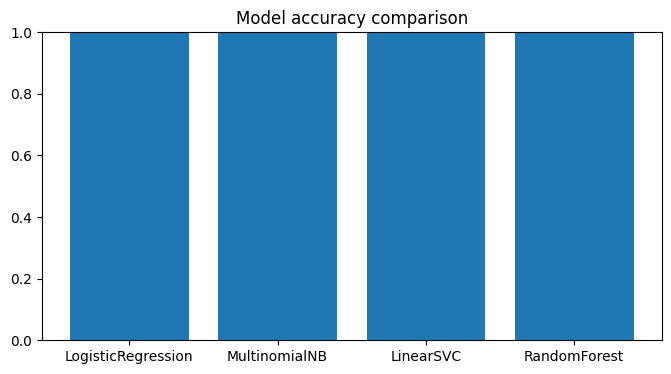

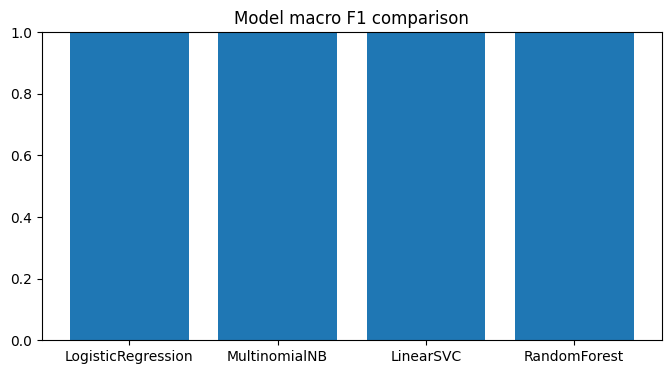

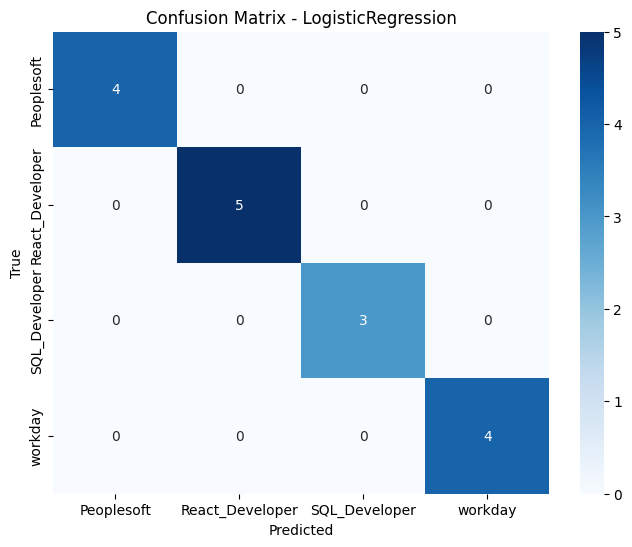

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# Bar plots
plt.figure(figsize=(8,4))
plt.bar(res_df['model'], res_df['accuracy'])
plt.title('Model accuracy comparison')
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(8,4))
plt.bar(res_df['model'], res_df['f1_macro'])
plt.title('Model macro F1 comparison')
plt.ylim(0,1)
plt.show()

# Confusion matrix for the best model
best_model = res_df.loc[0, 'model']
best_pipe = pipelines[best_model]
y_pred = best_pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=best_pipe.classes_)
fig, ax = plt.subplots(figsize=(8,6))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_pipe.classes_, yticklabels=best_pipe.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - {best_model}')
plt.show()


In [24]:
import joblib

# Get the best performing model pipeline
best_model_name = res_df.loc[0, 'model']
best_pipe = pipelines[best_model_name]

# Define the filename for the pickle file
pickle_filename = 'best_model.pkl'

# Dump the model to the pickle file
joblib.dump(best_pipe, pickle_filename)

print(f"The best model ('{best_model_name}') has been saved to '{pickle_filename}'")

The best model ('LogisticRegression') has been saved to 'best_model.pkl'


In [25]:
import joblib
!pip install joblib
!pip install streamlit

!streamlit run app.py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.2 MB/s eta 0:00:00
Usage: streamlit run [OPTIONS] [TARGET] [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [26]:
import docx
print("python-docx installed successfully!")

python-docx installed successfully!
